In [281]:
# Importing Relevant Packages

# Standard imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

# Statistical packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt

# Chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [282]:
med_data = pd.read_csv ('medical_clean.csv')
med_data.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat',
 'Item3':'Timely_visits','Item4':'Reliability',
 'Item5':'Options','Item6':'Hrs_treat',
 'Item7':'Courteous','Item8':'Active_listen'},inplace=True)
med_data.head()
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [283]:
#check if there are any missing data entries - if there are none then the output should be False
med_data.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [284]:
# Detecting Duplicates
# No Duplicates Detected
print(med_data.duplicated().value_counts())

False    10000
Name: count, dtype: int64


I used .describe() for the summary statistics of the data set. Boxplots and z-scores for outlier detections. Histograms to determine the distributions of the variables used in the regression analysis. value_counts() for tracking the categorical/dummy variables and how much of each value they contain. This is done for the dependent and independent variables of the regression analysis. value_counts() function returns Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default. 

Kept all the outliers as they seemed reasonable for the analysis. 

In [285]:
# finding the count of unique values in each column, then use value_counts to find unique values for specific columns
med_data.nunique()

CaseOrder             10000
Customer_id           10000
Interaction           10000
UID                   10000
City                   6072
State                    52
County                 1607
Zip                    8612
Lat                    8588
Lng                    8725
Population             5951
Area                      3
TimeZone                 26
Job                     639
Children                 11
Age                      72
Income                 9993
Marital                   5
Gender                    3
ReAdmis                   2
VitD_levels            9976
Doc_visits                9
Full_meals_eaten          8
vitD_supp                 6
Soft_drink                2
Initial_admin             3
HighBlood                 2
Stroke                    2
Complication_risk         3
Overweight                2
Arthritis                 2
Diabetes                  2
Hyperlipidemia            2
BackPain                  2
Anxiety                   2
Allergic_rhinitis   

In [286]:
med_data['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [287]:
med_data['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [288]:
med_data['Anxiety'].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [289]:
med_data['Reflux_esophagitis'].value_counts()

Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [290]:
med_data['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [291]:
med_data['Hyperlipidemia'].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [292]:
med_data['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [293]:
med_data['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [294]:
med_data['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [295]:
med_data['Initial_days'].value_counts()

Initial_days
63.544320    2
67.421390    2
70.325420    2
63.334690    1
67.036510    1
            ..
5.977596     1
5.799041     1
6.415853     1
7.328631     1
70.850590    1
Name: count, Length: 9997, dtype: int64

In [296]:
med_data['Full_meals_eaten'].value_counts()

Full_meals_eaten
0    3715
1    3615
2    1856
3     612
4     169
5      25
6       6
7       2
Name: count, dtype: int64

In [297]:
med_data['VitD_levels'].value_counts()

VitD_levels
18.135431    2
15.939760    2
17.821860    2
20.184170    2
18.741340    2
            ..
18.825293    1
16.849021    1
15.111106    1
20.583694    1
18.388620    1
Name: count, Length: 9976, dtype: int64

In [298]:
med_data['vitD_supp'].value_counts()

vitD_supp
0    6702
1    2684
2     544
3      64
4       5
5       1
Name: count, dtype: int64

In [299]:
med_data['Doc_visits'].value_counts()

Doc_visits
5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: count, dtype: int64

In [300]:
med_data['Age'].value_counts()

Age
47    161
52    159
74    159
41    157
86    156
     ... 
63    123
51    122
20    120
36    118
80    116
Name: count, Length: 72, dtype: int64

In [301]:
# Detecting outliers for Age variable
# No outliers present
med_data['z_score_age']=stats.zscore(med_data['Age'])
med_data[['Age','z_score_age']].head

<bound method NDFrame.head of       Age  z_score_age
0      53    -0.024795
1      51    -0.121706
2      53    -0.024795
3      78     1.186592
4      22    -1.526914
...   ...          ...
9995   25    -1.381548
9996   87     1.622691
9997   45    -0.412438
9998   43    -0.509349
9999   70     0.798948

[10000 rows x 2 columns]>

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([-1.72073600e+00, -1.37670219e+00, -1.03266837e+00, -6.88634559e-01,
        -3.44600744e-01, -5.66928963e-04,  3.43466886e-01,  6.87500701e-01,
         1.03153452e+00,  1.37556833e+00,  1.71960215e+00]),
 <BarContainer object of 10 artists>)

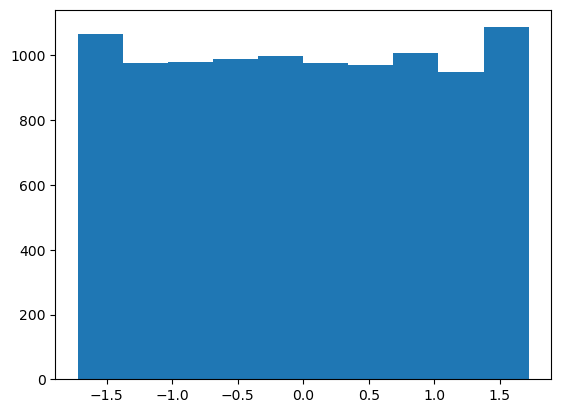

In [302]:
plt.hist(med_data['z_score_age'])

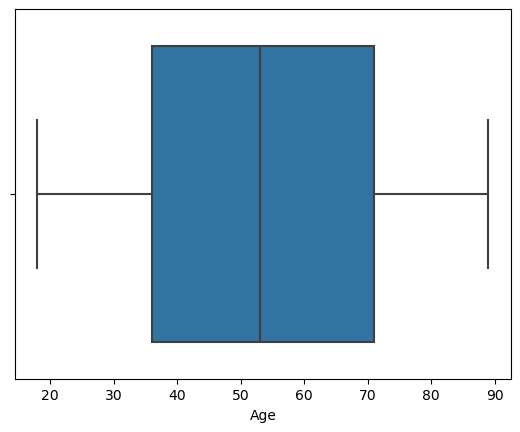

In [303]:
boxplot=sns.boxplot(x='Age',data=med_data)

In [304]:
# Detecting outliers via z-scores for Doc_visits variable
# No outliers present
med_data['z_score_doc_visits']=stats.zscore(med_data['Doc_visits'])
med_data[['Doc_visits','z_score_doc_visits']].head

<bound method NDFrame.head of       Doc_visits  z_score_doc_visits
0              6            0.944647
1              4           -0.967981
2              4           -0.967981
3              4           -0.967981
4              5           -0.011667
...          ...                 ...
9995           4           -0.967981
9996           5           -0.011667
9997           4           -0.967981
9998           5           -0.011667
9999           5           -0.011667

[10000 rows x 2 columns]>

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([-3.83692119, -3.07187036, -2.30681952, -1.54176869, -0.77671786,
        -0.01166703,  0.75338381,  1.51843464,  2.28348547,  3.04853631,
         3.81358714]),
 <BarContainer object of 10 artists>)

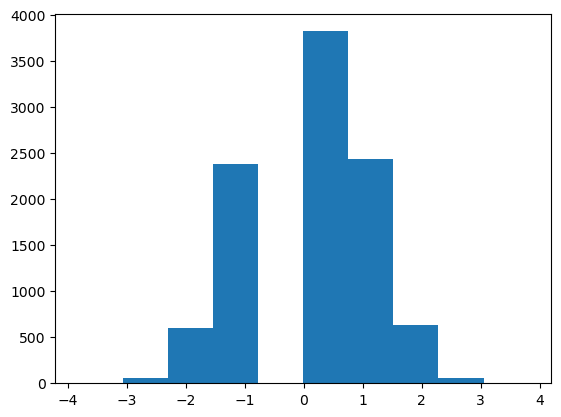

In [305]:
plt.hist(med_data['z_score_doc_visits'])

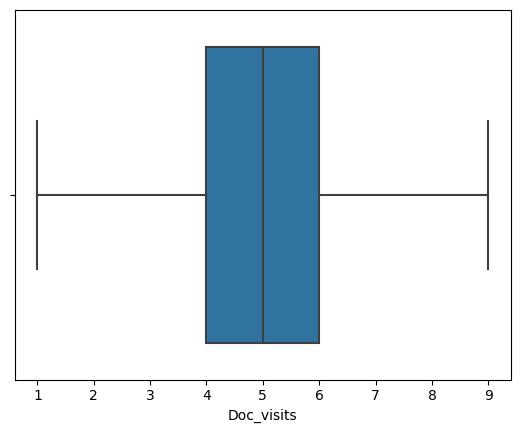

In [306]:
boxplot=sns.boxplot(x='Doc_visits',data=med_data)

In [307]:
# Detecting outliers for VitD_levels variable
# Outliers are present and will be retained
med_data['z_score_vitd']=stats.zscore(med_data['VitD_levels'])
med_data[['VitD_levels','z_score_vitd']].head

<bound method NDFrame.head of       VitD_levels  z_score_vitd
0       19.141466      0.583603
1       18.940352      0.483901
2       18.057507      0.046227
3       16.576858     -0.687811
4       17.439069     -0.260366
...           ...           ...
9995    16.980860     -0.487525
9996    18.177020      0.105476
9997    17.129070     -0.414049
9998    19.910430      0.964820
9999    18.388620      0.210377

[10000 rows x 2 columns]>

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([-4.04424997, -3.22189522, -2.39954048, -1.57718573, -0.75483099,
         0.06752375,  0.8898785 ,  1.71223324,  2.53458799,  3.35694273,
         4.17929747]),
 <BarContainer object of 10 artists>)

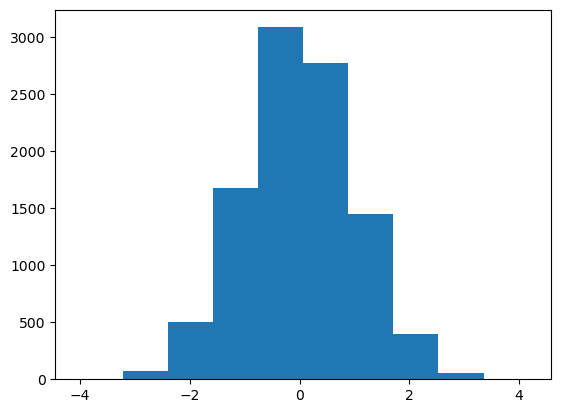

In [308]:
plt.hist(med_data['z_score_vitd'])

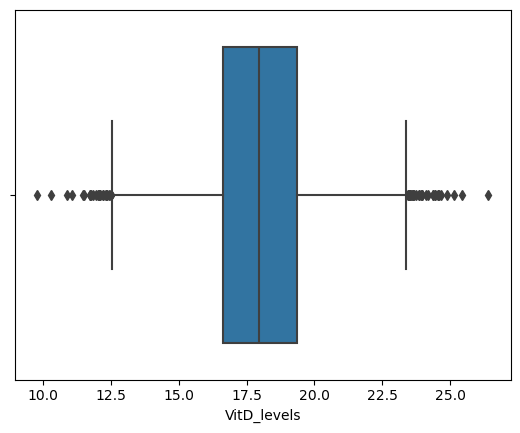

In [309]:
boxplot=sns.boxplot(x='VitD_levels',data=med_data)

In [310]:
# Detecting outliers for VitD_supp variable
# Outliers are present and will be retained
med_data['z_score_vitd_supp']=stats.zscore(med_data['vitD_supp'])
med_data[['vitD_supp','z_score_vitd_supp']].head

<bound method NDFrame.head of       vitD_supp  z_score_vitd_supp
0             0          -0.634713
1             1           0.956445
2             0          -0.634713
3             0          -0.634713
4             2           2.547602
...         ...                ...
9995          1           0.956445
9996          0          -0.634713
9997          0          -0.634713
9998          1           0.956445
9999          1           0.956445

[10000 rows x 2 columns]>

(array([6.702e+03, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([-0.63471264,  0.160866  ,  0.95644465,  1.75202329,  2.54760193,
         3.34318058,  4.13875922,  4.93433787,  5.72991651,  6.52549516,
         7.3210738 ]),
 <BarContainer object of 10 artists>)

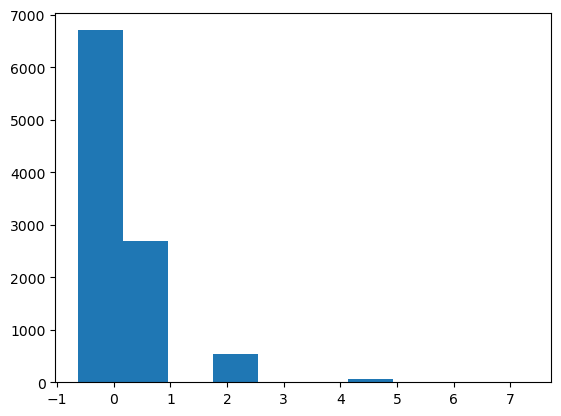

In [311]:
plt.hist(med_data['z_score_vitd_supp'])

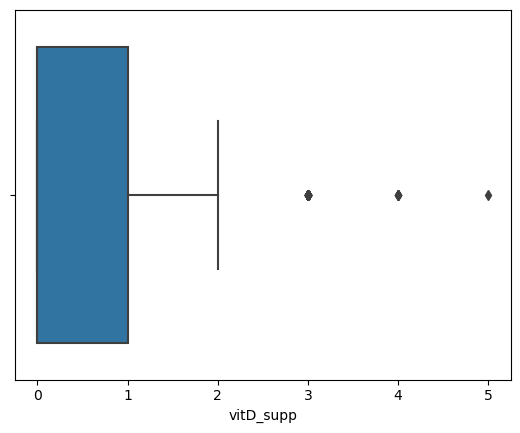

In [312]:
boxplot=sns.boxplot(x='vitD_supp',data=med_data)

In [313]:
# Detecting outliers for Full_meals_eaten variable
# Outliers are present and will be retained
med_data['z_score_meals']=stats.zscore(med_data['Full_meals_eaten'])
med_data[['Full_meals_eaten','z_score_meals']].head

<bound method NDFrame.head of       Full_meals_eaten  z_score_meals
0                    0      -0.993387
1                    2       0.990609
2                    1      -0.001389
3                    1      -0.001389
4                    0      -0.993387
...                ...            ...
9995                 2       0.990609
9996                 0      -0.993387
9997                 2       0.990609
9998                 2       0.990609
9999                 0      -0.993387

[10000 rows x 2 columns]>

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([-0.99338686, -0.29898822,  0.39541043,  1.08980907,  1.78420771,
         2.47860636,  3.173005  ,  3.86740364,  4.56180229,  5.25620093,
         5.95059957]),
 <BarContainer object of 10 artists>)

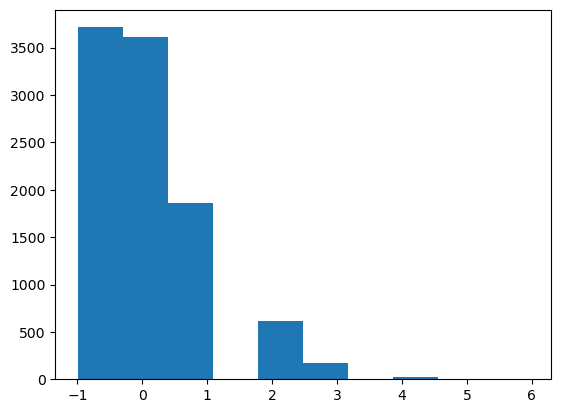

In [314]:
plt.hist(med_data['z_score_meals'])

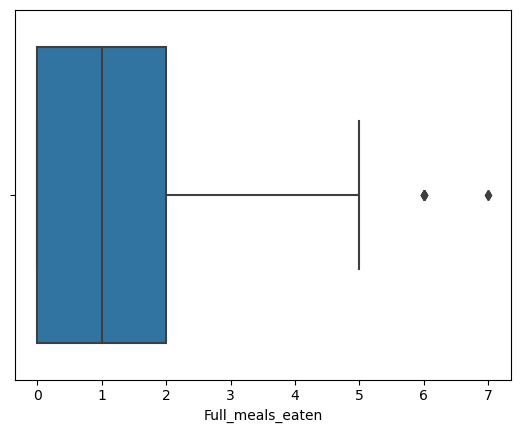

In [315]:
boxplot=sns.boxplot(x='Full_meals_eaten',data=med_data)

In [316]:
# Detecting outliers for Initial_days variable (continuous dependent variable)
# No outliers present
med_data['z_score_initial_days']=stats.zscore(med_data['Initial_days'])
med_data[['TotalCharge','z_score_initial_days']].head

<bound method NDFrame.head of       TotalCharge  z_score_initial_days
0     3726.702860             -0.907310
1     4193.190458             -0.734595
2     2434.234222             -1.128292
3     2127.830423             -1.244503
4     2113.073274             -1.261991
...           ...                   ...
9995  6850.942000              0.650217
9996  7741.690000              1.300475
9997  8276.481000              1.356958
9998  7644.483000              1.098585
9999  7887.553000              1.383429

[10000 rows x 2 columns]>

(array([2563., 1586.,  669.,  157.,   34.,  271.,  546., 1033., 1451.,
        1690.]),
 array([-1.27160124, -1.00179951, -0.73199778, -0.46219605, -0.19239432,
         0.07740741,  0.34720914,  0.61701087,  0.88681261,  1.15661434,
         1.42641607]),
 <BarContainer object of 10 artists>)

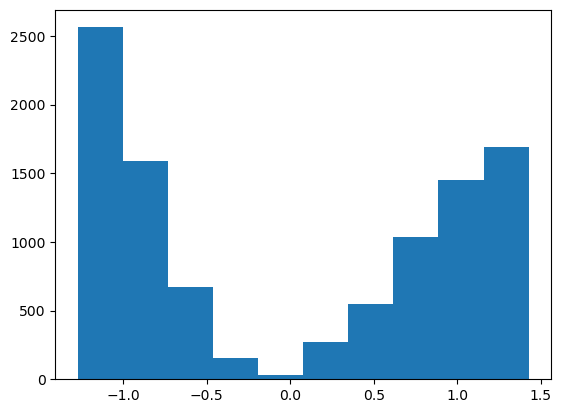

In [317]:
plt.hist(med_data['z_score_initial_days'])

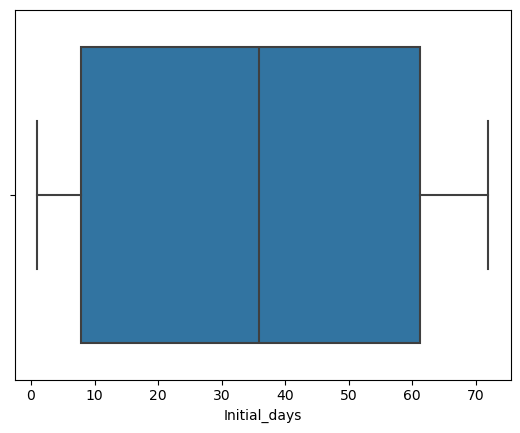

In [318]:
boxplot=sns.boxplot(x='Initial_days',data=med_data)

In [319]:
# remove demographic data from the data set since these entries won't be necessary for the multiple regression analysis
med_data = med_data.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job'], axis=1)


The data transformation that was required was limited to the re-expression of categorical variables to numerical variables. These include all of the ordinal variables: High Blood Pressure, Overweight, Anxiety, Reflux Esophagitis, Back Pain, Hyperlipidemia, Stroke, Arthritis, Diabetes, Asthma. All of the ordinal variables that were Yes or No values were re-expressed into binary/boolean 1 and 0, respectively. Also considered as dummy variables.

Variables such as Gender, Marital, Initial_admin, Complication_risk, Services were also re-expressed as numerical values due to one hot encoding used for nominal values.

In [320]:
# convert categorical/factor variables with yes/no values to numeric 1/0 values
med_data = med_data.replace(to_replace = ['Yes','No'],value = [1,0])
med_data

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,z_score_age,z_score_doc_visits,z_score_vitd,z_score_vitd_supp,z_score_meals,z_score_initial_days
0,1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,-0.024795,0.944647,0.583603,-0.634713,-0.993387,-0.907310
1,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,-0.121706,-0.967981,0.483901,0.956445,0.990609,-0.734595
2,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,-0.024795,-0.967981,0.046227,-0.634713,-0.001389,-1.128292
3,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.186592,-0.967981,-0.687811,-0.634713,-0.001389,-1.244503
4,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,-1.526914,-0.011667,-0.260366,2.547602,-0.993387,-1.261991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,Male,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,-1.381548,-0.967981,-0.487525,0.956445,0.990609,0.650217
9996,4,87,14983.02,Widowed,Male,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,1.622691,-0.011667,0.105476,-0.634713,-0.993387,1.300475
9997,3,45,65917.81,Separated,Female,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,-0.412438,-0.967981,-0.414049,-0.634713,0.990609,1.356958
9998,3,43,29702.32,Divorced,Male,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,-0.509349,-0.011667,0.964820,0.956445,0.990609,1.098585


In [321]:
# convert the categorical variable of genders to a numeric variable
med_data['Gender'] = med_data['Gender'].replace(['Male','Female','Nonbinary'],[1,2,3])
med_data

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,z_score_age,z_score_doc_visits,z_score_vitd,z_score_vitd_supp,z_score_meals,z_score_initial_days
0,1,53,86575.93,Divorced,1,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,-0.024795,0.944647,0.583603,-0.634713,-0.993387,-0.907310
1,3,51,46805.99,Married,2,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,-0.121706,-0.967981,0.483901,0.956445,0.990609,-0.734595
2,3,53,14370.14,Widowed,2,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,-0.024795,-0.967981,0.046227,-0.634713,-0.001389,-1.128292
3,0,78,39741.49,Married,1,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.186592,-0.967981,-0.687811,-0.634713,-0.001389,-1.244503
4,1,22,1209.56,Widowed,2,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,-1.526914,-0.011667,-0.260366,2.547602,-0.993387,-1.261991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,1,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,-1.381548,-0.967981,-0.487525,0.956445,0.990609,0.650217
9996,4,87,14983.02,Widowed,1,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,1.622691,-0.011667,0.105476,-0.634713,-0.993387,1.300475
9997,3,45,65917.81,Separated,2,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,-0.412438,-0.967981,-0.414049,-0.634713,0.990609,1.356958
9998,3,43,29702.32,Divorced,1,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,-0.509349,-0.011667,0.964820,0.956445,0.990609,1.098585


In [322]:
# convert the non-married Marital status values to "Married/Not Married", then convert "Married/Not Married" to "1/0"
#this will make the Marital variable easier to work with during regression analysis
med_data['Marital'] = med_data['Marital'].replace(['Divorced','Widowed','Separated','Never Married'],'Not Married')
med_data['Marital'] = med_data['Marital'].replace(['Married','Not Married'],[1,0])

In [323]:
# convert the Initial_Admin, Complication_risk, and Services variables into integers before proceeding
med_data['Initial_admin'] = med_data['Initial_admin'].replace(['Elective Admission','Observation Admission','Emergency Admission'],[1,2,3])
med_data['Complication_risk'] = med_data['Complication_risk'].replace(['Low','Medium','High'],[1,2,3])
med_data['Services'] = med_data['Services'].replace(['Blood Work','CT Scan','Intravenous','MRI'],[1,2,3,4])
med_data.info()
med_data.describe()
my_list = med_data.columns.values.tolist()
print(my_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  int64  
 4   Gender                10000 non-null  int64  
 5   ReAdmis               10000 non-null  int64  
 6   VitD_levels           10000 non-null  float64
 7   Doc_visits            10000 non-null  int64  
 8   Full_meals_eaten      10000 non-null  int64  
 9   vitD_supp             10000 non-null  int64  
 10  Soft_drink            10000 non-null  int64  
 11  Initial_admin         10000 non-null  int64  
 12  HighBlood             10000 non-null  int64  
 13  Stroke                10000 non-null  int64  
 14  Complication_risk     10000 non-null  int64  
 15  Overweight          

In [324]:
# check that changes were completed for the three variables above: Initial_admin, Complication_risk, Services
med_data

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,z_score_age,z_score_doc_visits,z_score_vitd,z_score_vitd_supp,z_score_meals,z_score_initial_days
0,1,53,86575.93,0,1,0,19.141466,6,0,0,0,3,1,0,2,0,1,1,0,1,1,1,0,1,1,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,-0.024795,0.944647,0.583603,-0.634713,-0.993387,-0.907310
1,3,51,46805.99,1,2,0,18.940352,4,2,1,0,3,1,0,3,1,0,0,0,0,0,0,1,0,3,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,-0.121706,-0.967981,0.483901,0.956445,0.990609,-0.734595
2,3,53,14370.14,0,2,0,18.057507,4,1,0,0,1,1,0,2,1,0,1,0,0,0,0,0,0,1,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,-0.024795,-0.967981,0.046227,-0.634713,-0.001389,-1.128292
3,0,78,39741.49,1,1,0,16.576858,4,1,0,0,1,0,1,2,0,1,0,0,0,0,0,1,1,1,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.186592,-0.967981,-0.687811,-0.634713,-0.001389,-1.244503
4,1,22,1209.56,0,2,0,17.439069,5,0,2,1,1,0,0,1,0,0,0,1,0,0,1,0,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,-1.526914,-0.011667,-0.260366,2.547602,-0.993387,-1.261991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,0,1,0,16.980860,4,2,1,0,3,1,0,2,0,0,0,0,0,1,0,1,0,3,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,-1.381548,-0.967981,-0.487525,0.956445,0.990609,0.650217
9996,4,87,14983.02,0,1,1,18.177020,5,0,0,0,1,1,0,2,1,1,1,0,0,0,0,0,1,2,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,1.622691,-0.011667,0.105476,-0.634713,-0.993387,1.300475
9997,3,45,65917.81,0,2,1,17.129070,4,2,0,1,1,1,0,3,1,0,0,0,0,1,1,0,0,3,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,-0.412438,-0.967981,-0.414049,-0.634713,0.990609,1.356958
9998,3,43,29702.32,0,1,1,19.910430,5,2,1,0,3,0,0,2,1,0,0,0,1,0,0,0,0,1,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,-0.509349,-0.011667,0.964820,0.956445,0.990609,1.098585


In [325]:
# move the chosen target variable "Initial_days" to beginning of the columns
med_data = med_data[['Initial_days','Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges', 'Timely_admis', 'Timely_treat', 'Timely_visits', 'Reliability', 'Options', 'Hrs_treat', 'Courteous', 'Active_listen']]
# Confirm that the target variable was moved before exporting the prepared dataset
my_list = med_data.columns.values.tolist()
print(my_list)
# describe the dataframe to identify distribution of variables
med_data.describe()

['Initial_days', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges', 'Timely_admis', 'Timely_treat', 'Timely_visits', 'Reliability', 'Options', 'Hrs_treat', 'Courteous', 'Active_listen']


,Initial_days,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.455299,2.097200,53.511700,40490.495160,0.202300,1.544600,0.366900,17.964262,5.012200,1.001400,0.398900,0.257500,2.255600,0.409000,0.199300,2.123300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,1.862500,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,26.309341,2.163659,20.638538,28521.153293,0.401735,0.539296,0.481983,2.017231,1.045734,1.008117,0.628505,0.437279,0.831347,0.491674,0.399494,0.730172,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,0.986251,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.001981,0.000000,18.000000,154.080000,0.000000,1.000000,0.000000,9.806483,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.896215,0.000000,36.000000,19598.775000,0.000000,1.000000,0.000000,16.626439,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,35.836244,1.000000,53.000000,33768.420000,0.000000,2.000000,0.000000,17.951122,5.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,61.161020,3.000000,71.000000,54296.402500,0.000000,2.000000,1.000000,19.347963,6.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,71.981490,10.000000,89.000000,207249.100000,1.000000,3.000000,1.000000,26.394449,9.000000,7.000000,5.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Any categorical variables that have > 3-5 unique values would be removed to reduce high cardinality. The categoricals with high cardinality are Services, Timely_admis, Timely_treat, Timely_visits, Reliability, Options, Hrs_treat, Courteous, Active_listen. Listed below are the summary statistics for the independent and dependent variables of the MLR.

In [326]:
med_data['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [327]:
med_data['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [328]:
med_data['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [329]:
med_data['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [330]:
med_data['vitD_supp'].describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

In [331]:
med_data['Full_meals_eaten'].describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [332]:
med_data['HighBlood'].describe()

count    10000.000000
mean         0.409000
std          0.491674
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HighBlood, dtype: float64

In [333]:
med_data['Overweight'].describe()

count    10000.000000
mean         0.709400
std          0.454062
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Overweight, dtype: float64

In [334]:
med_data['Anxiety'].describe()

count    10000.000000
mean         0.321500
std          0.467076
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Anxiety, dtype: float64

In [335]:
med_data['Reflux_esophagitis'].describe()

count    10000.000000
mean         0.413500
std          0.492486
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Reflux_esophagitis, dtype: float64

In [336]:
med_data['BackPain'].describe()

count    10000.000000
mean         0.411400
std          0.492112
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: BackPain, dtype: float64

In [337]:
med_data['Hyperlipidemia'].describe()

count    10000.000000
mean         0.337200
std          0.472777
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Hyperlipidemia, dtype: float64

In [338]:
med_data['Stroke'].describe()

count    10000.000000
mean         0.199300
std          0.399494
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Stroke, dtype: float64

In [339]:
med_data['Arthritis'].describe()

count    10000.000000
mean         0.357400
std          0.479258
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Arthritis, dtype: float64

In [340]:
med_data['Diabetes'].describe()

count    10000.00000
mean         0.27380
std          0.44593
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: Diabetes, dtype: float64

(array([2563., 1586.,  669.,  157.,   34.,  271.,  546., 1033., 1451.,
        1690.]),
 array([ 1.00198092,  8.09993183, 15.19788274, 22.29583364, 29.39378455,
        36.49173546, 43.58968637, 50.68763728, 57.78558818, 64.88353909,
        71.98149   ]),
 <BarContainer object of 10 artists>)

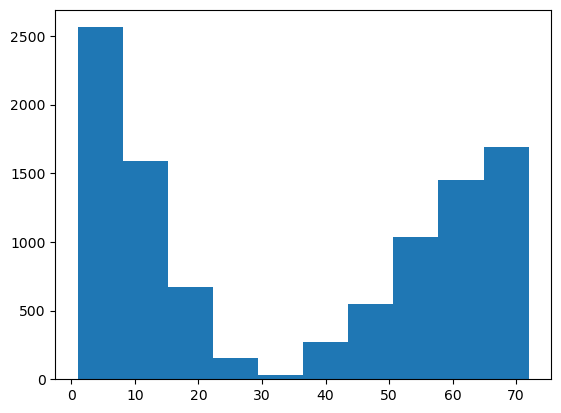

In [341]:
plt.hist(med_data['Initial_days'])

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

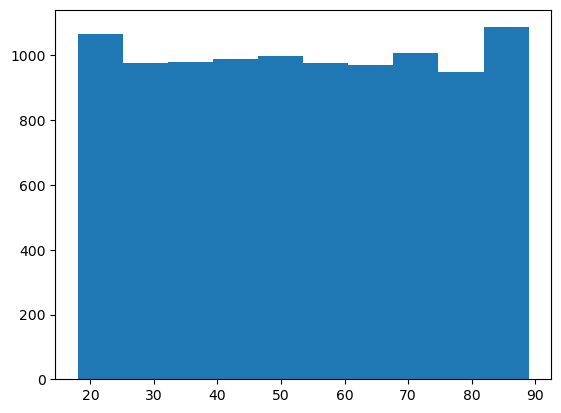

In [342]:
plt.hist(med_data['Age'])

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

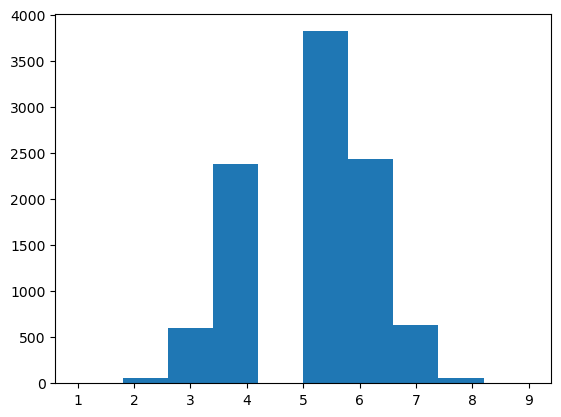

In [343]:
plt.hist(med_data['Doc_visits'])

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([ 9.806483  , 11.46527957, 13.12407614, 14.78287271, 16.44166928,
        18.10046585, 19.75926243, 21.418059  , 23.07685557, 24.73565214,
        26.39444871]),
 <BarContainer object of 10 artists>)

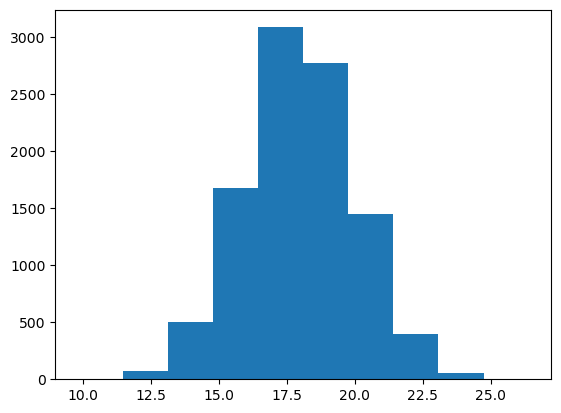

In [344]:
plt.hist(med_data['VitD_levels'])

(array([6.702e+03, 0.000e+00, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

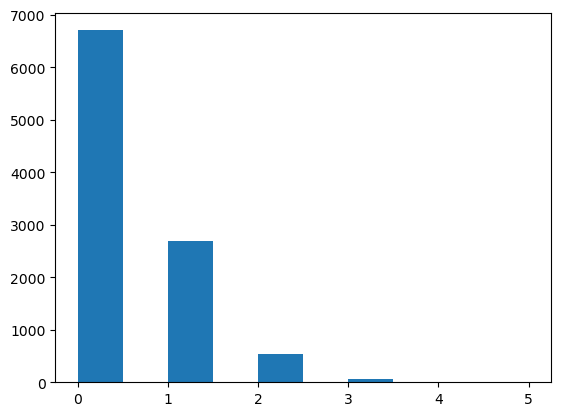

In [345]:
plt.hist(med_data['vitD_supp'])

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

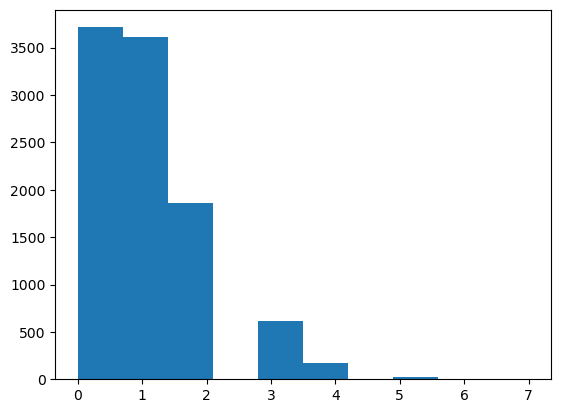

In [346]:
plt.hist(med_data['Full_meals_eaten'])

(array([5910.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4090.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

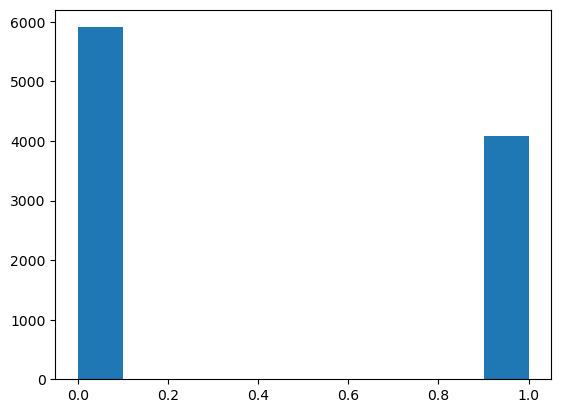

In [347]:
plt.hist(med_data['HighBlood'])

(array([2906.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7094.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

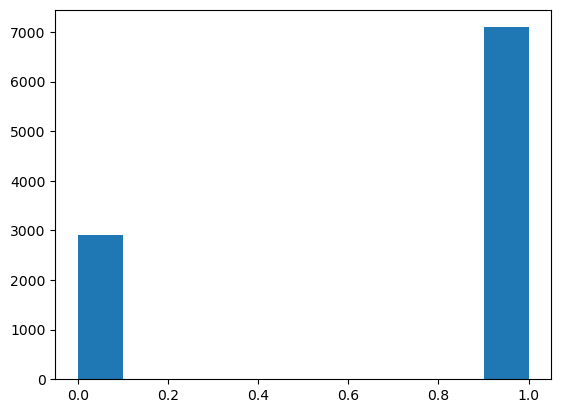

In [348]:
plt.hist(med_data['Overweight'])

(array([6785.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3215.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

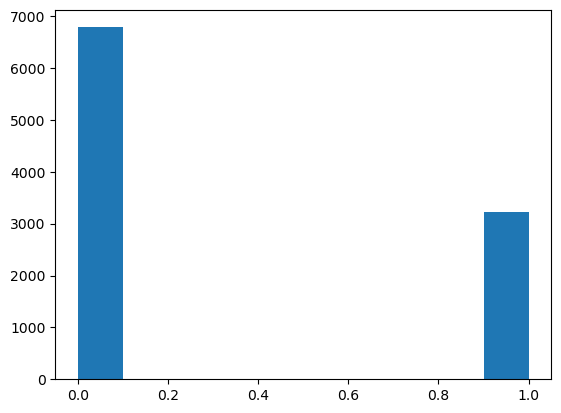

In [349]:
plt.hist(med_data['Anxiety'])

(array([5865.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4135.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

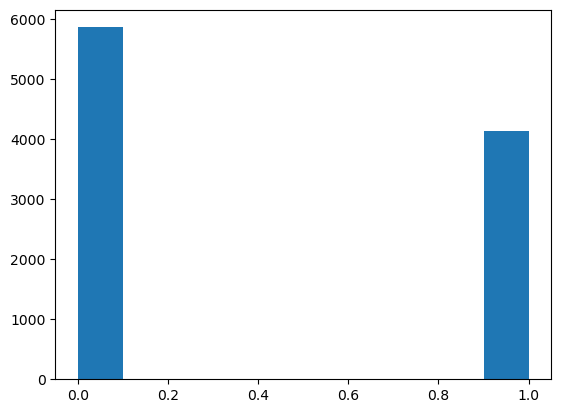

In [350]:
plt.hist(med_data['Reflux_esophagitis'])

(array([5886.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4114.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

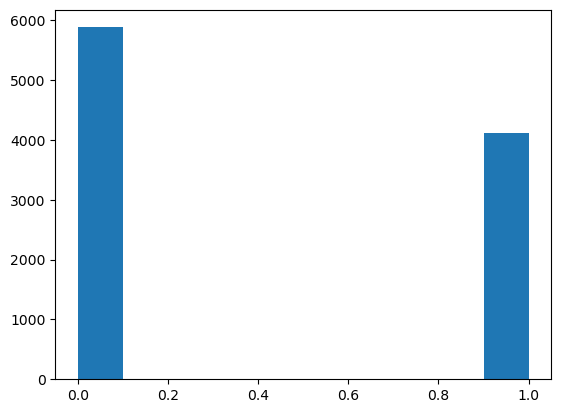

In [351]:
plt.hist(med_data['BackPain'])

(array([6628.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

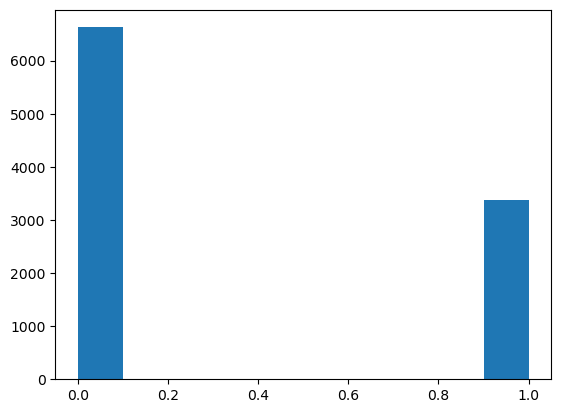

In [352]:
plt.hist(med_data['Hyperlipidemia'])

(array([8007.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1993.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

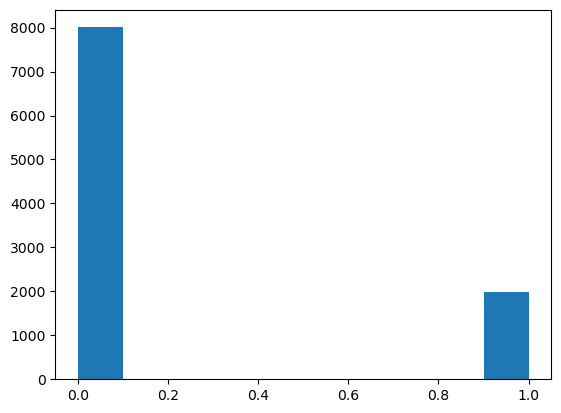

In [353]:
plt.hist(med_data['Stroke'])

(array([6426.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3574.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

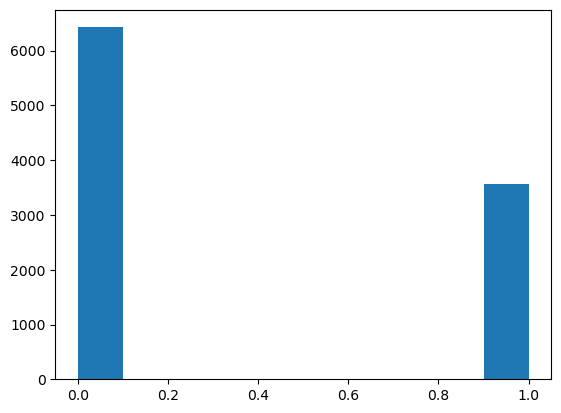

In [354]:
plt.hist(med_data['Arthritis'])

(array([7262.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2738.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

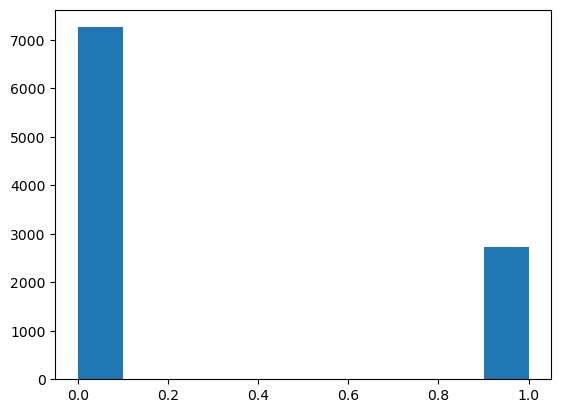

In [355]:
plt.hist(med_data['Diabetes'])

Bivariate visualizations between the continuous variable and all the independent variables associated in the regression analysis. Scatterplots were used to visualize the relationships. 

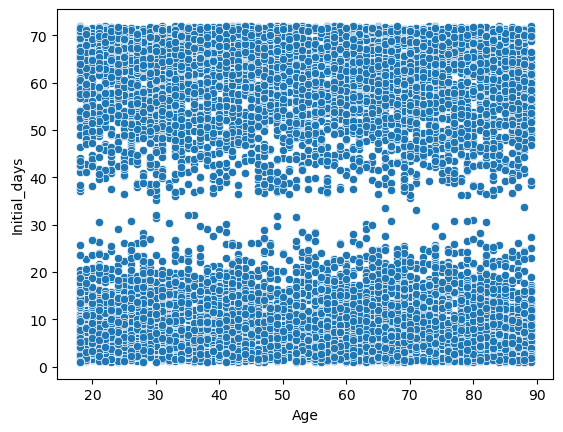

In [356]:
# Initial_days and Age
sns.scatterplot(x=med_data['Age'], y=med_data['Initial_days'])
plt.show();

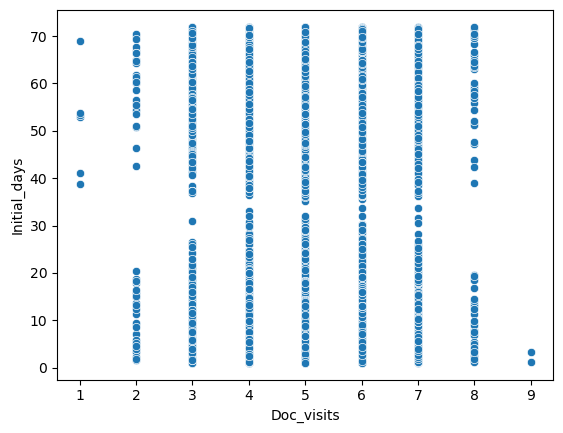

In [357]:
# Initial_days and Doctor Visits
sns.scatterplot(x=med_data['Doc_visits'], y=med_data['Initial_days'])
plt.show();

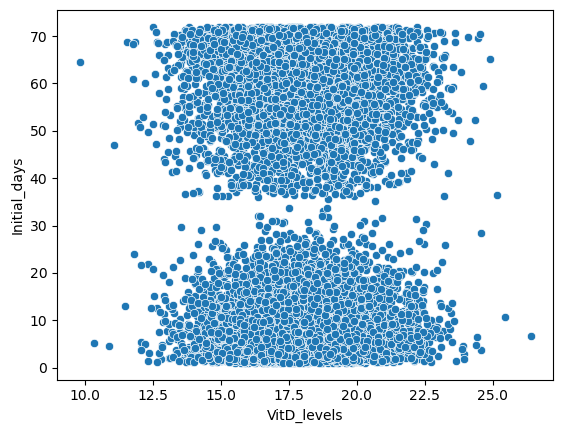

In [358]:
# Initial_days and Vitamin D Levels
sns.scatterplot(x=med_data['VitD_levels'], y=med_data['Initial_days'])
plt.show();

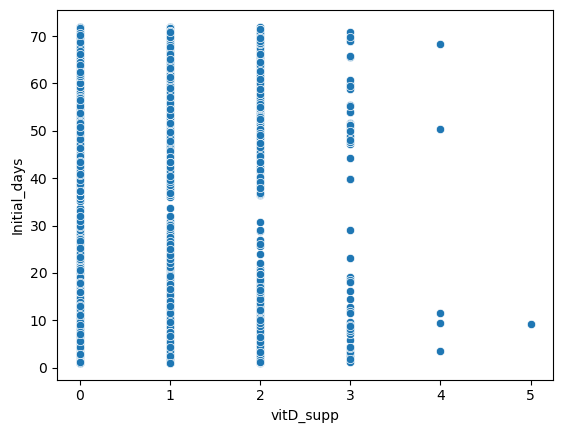

In [359]:
# Initial_days and Vitamin D Supplements
sns.scatterplot(x=med_data['vitD_supp'], y=med_data['Initial_days'])
plt.show();

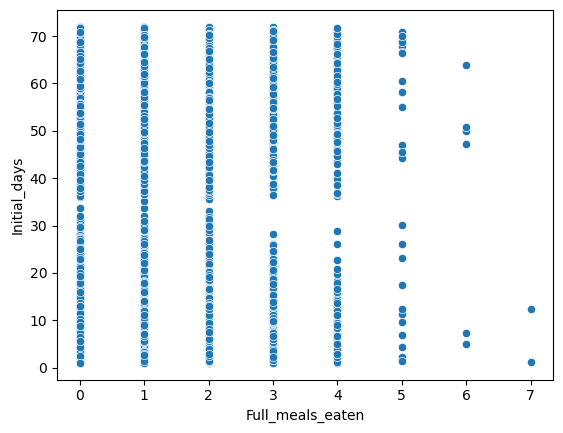

In [360]:
# Initial_days and Full Meals Eaten
sns.scatterplot(x=med_data['Full_meals_eaten'], y=med_data['Initial_days'])
plt.show();

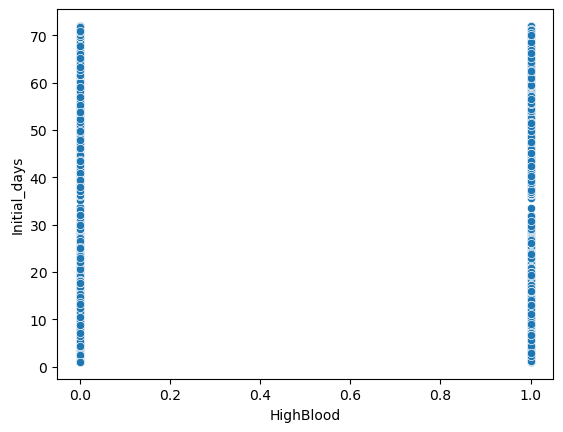

In [361]:
# Initial_days and High Blood Pressure
sns.scatterplot(x=med_data['HighBlood'], y=med_data['Initial_days'])
plt.show();

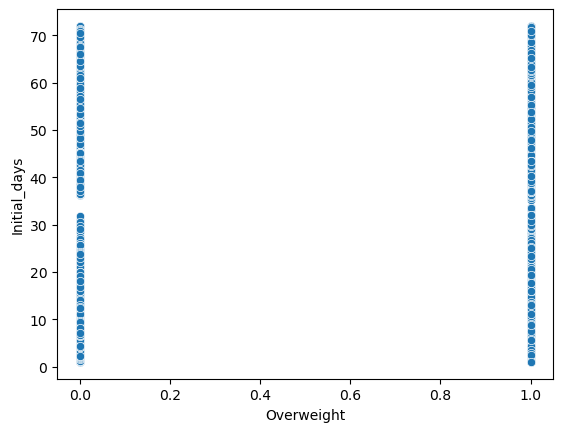

In [362]:
# Initial_days and Overweight
sns.scatterplot(x=med_data['Overweight'], y=med_data['Initial_days'])
plt.show();

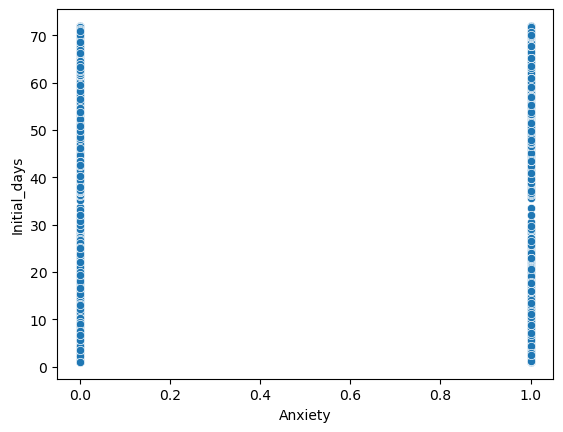

In [363]:
# Initial_days and Anxiety
sns.scatterplot(x=med_data['Anxiety'], y=med_data['Initial_days'])
plt.show();

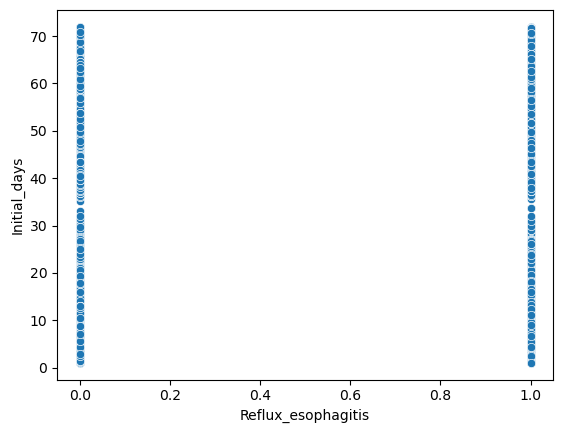

In [364]:
# Initial_days and Reflux Esophagitis
sns.scatterplot(x=med_data['Reflux_esophagitis'], y=med_data['Initial_days'])
plt.show();

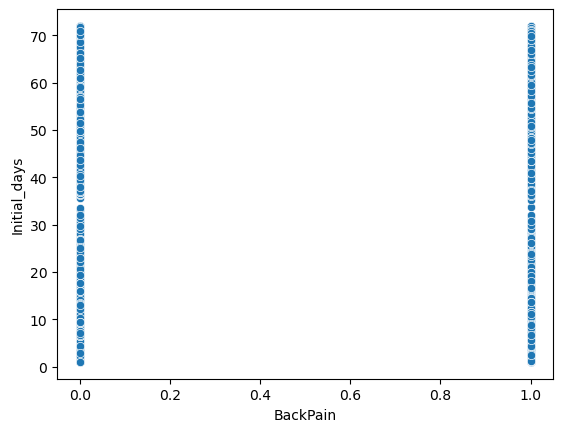

In [365]:
# Initial_days and Back Pain
sns.scatterplot(x=med_data['BackPain'], y=med_data['Initial_days'])
plt.show();

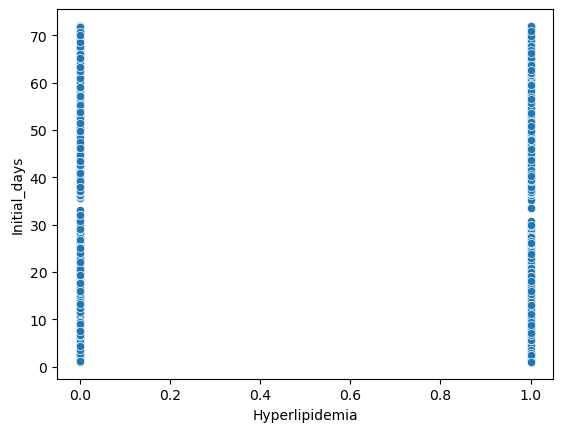

In [366]:
# Initial_days and Hyperlipidemia
sns.scatterplot(x=med_data['Hyperlipidemia'], y=med_data['Initial_days'])
plt.show();

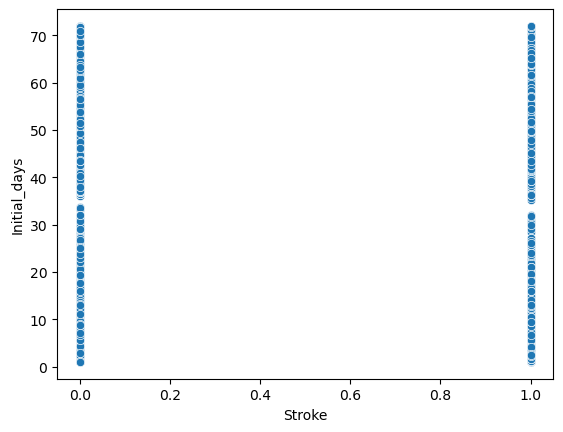

In [367]:
# Initial_days and Stroke
sns.scatterplot(x=med_data['Stroke'], y=med_data['Initial_days'])
plt.show();

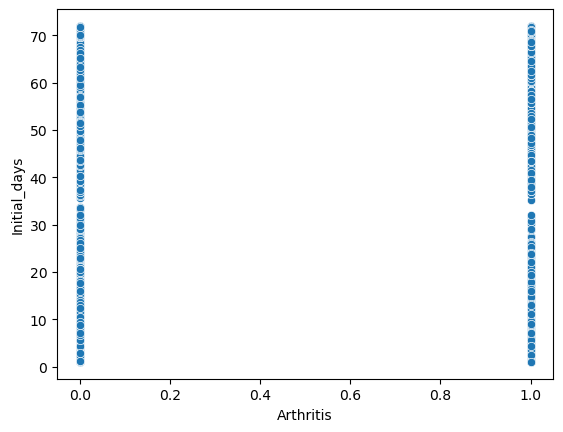

In [368]:
# Initial_days and Arthritis
sns.scatterplot(x=med_data['Arthritis'], y=med_data['Initial_days'])
plt.show();

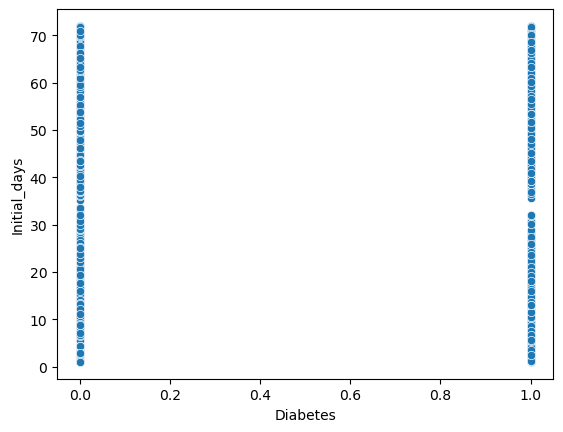

In [369]:
# Initial_days and Diabetes
sns.scatterplot(x=med_data['Diabetes'], y=med_data['Initial_days'])
plt.show();

In [370]:
mlr_med_data = med_data[['Initial_days', 'Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']]

mlr_med_data.to_csv('mlr_med_data_final.csv', index=False)

D208 Course Textbook: Practical Statistics for Data Scientists

In [371]:
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.423
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.133
Time:                        10:56:51   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9985   BIC:                         9.389e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0204      0

By assessing the outcome of the initial MLR model, we can see that the R-squared is remarkably low (indicating that the model is not a good fit). I will reduce the model with the Backward Stepwise elimination method until we are left with only the statistically significant variables. I will begin by removing the variables one by one by selecting the highest p-value variable for removal. In this case, the highest p-value is the Stroke variable. We will use the significance level of 5% (equal to or less than 0.05 p-values) for the purposes of this model.

I also tested for multicollinearity by using the variance inflation factor (VIF). Doc_visits and VitD_levels have VIFs > 10 which means there is multicollinearity going on. Removing VitD_levels first since it has the highest VIF. 

In [372]:
#set independent variable for VIF
X=mlr_med_data[['Age', 'Doc_visits', 'Overweight', 'Diabetes', 'Anxiety', 'HighBlood', 'Stroke', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'Reflux_esophagitis', 'BackPain', 'Hyperlipidemia', 'Arthritis']]

In [373]:
#VIF dataframe
vif_mlr_med_data=pd.DataFrame()
vif_mlr_med_data["feature"]=X.columns

In [374]:
#calculate VIF for all independent variables
vif_mlr_med_data["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [375]:
print(vif_mlr_med_data)

               feature        VIF
0                  Age   7.338955
1           Doc_visits  19.507107
2           Overweight   3.384107
3             Diabetes   1.372108
4              Anxiety   1.470377
5            HighBlood   1.687991
6               Stroke   1.248203
7          VitD_levels  26.523258
8            vitD_supp   1.399055
9     Full_meals_eaten   1.979946
10  Reflux_esophagitis   1.691434
11            BackPain   1.692286
12      Hyperlipidemia   1.499699
13           Arthritis   1.551771


In [376]:
#reducing model - removing VitD_levels which has the highest VIF of 26.5 indicating high multicollinearity
X=mlr_med_data[['Age', 'Doc_visits', 'Overweight', 'Diabetes', 'Anxiety', 'HighBlood', 'Stroke', 'vitD_supp', 'Full_meals_eaten', 'Reflux_esophagitis', 'BackPain', 'Hyperlipidemia', 'Arthritis']]

In [377]:
#VIF dataframe
vif_mlr_med_data=pd.DataFrame()
vif_mlr_med_data["feature"]=X.columns

In [378]:
#calculating VIF for independent variables
vif_mlr_med_data["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [379]:
#This will be the variables used for MLR since all VIFs are less than 10
print(vif_mlr_med_data)

               feature       VIF
0                  Age  6.442092
1           Doc_visits  9.815312
2           Overweight  3.234232
3             Diabetes  1.367356
4              Anxiety  1.456743
5            HighBlood  1.672413
6               Stroke  1.242117
7            vitD_supp  1.390648
8     Full_meals_eaten  1.938710
9   Reflux_esophagitis  1.669353
10            BackPain  1.677797
11      Hyperlipidemia  1.482602
12           Arthritis  1.537782


In [380]:
#re-run OLS with the independent variable that we removed due to VIF. Stepwise eliminate variables until p-values are .05 or less.
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Arthritis', 'Diabetes', 'Stroke']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.526
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0997
Time:                        10:56:58   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9986   BIC:                         9.389e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0204      0

In [381]:
# Remove Stroke first since it has the highest P-value
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Arthritis', 'Diabetes']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.650
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0712
Time:                        10:57:12   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9987   BIC:                         9.388e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0203      0

In [382]:
# Remove Diabetes because it has the highest p-value
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.797
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0488
Time:                        10:57:15   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9988   BIC:                         9.387e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0203      0

In [383]:
# Remove hyperlipidemia since it has the highest p-value
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.959
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0335
Time:                        10:57:18   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9989   BIC:                         9.386e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0203      0

In [384]:
# Remove HighBlood since it has the highest p-value
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.133
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0236
Time:                        10:57:19   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9990   BIC:                         9.385e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0202      0

In [385]:
# Remove Doc_visits since it has the highest p-value
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.340
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0165
Time:                        10:57:19   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9991   BIC:                         9.384e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0202      0

In [386]:
# Remove Overweight variable since it has the highest p-value
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'vitD_supp', 'Full_meals_eaten',
              'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.502
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0144
Time:                        10:57:19   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9992   BIC:                         9.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0203      0

In [387]:
# Remove Anxiety since it has the highest p-value.
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'vitD_supp', 'Full_meals_eaten',
              'Reflux_esophagitis', 'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.692
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0130
Time:                        10:57:20   Log-Likelihood:                -46880.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9993   BIC:                         9.382e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0204      0

In [388]:
# Remove Reflux_esophagitis since it has the highest p-value.
y = mlr_med_data.Initial_days
x = mlr_med_data[['Age', 'vitD_supp', 'Full_meals_eaten',
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.939
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0118
Time:                        10:57:20   Log-Likelihood:                -46881.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9994   BIC:                         9.382e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0201      0.013  

In [389]:
# Remove Age since it has the highest p-value.
y = mlr_med_data.Initial_days
x = mlr_med_data[['vitD_supp', 'Full_meals_eaten',
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.053
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0159
Time:                        10:57:20   Log-Likelihood:                -46882.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9995   BIC:                         9.381e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
vitD_supp            0.6663      0.419  

In [390]:
# Remove vitD_supp since it has the highest p-value.
y = mlr_med_data.Initial_days
x = mlr_med_data[['Full_meals_eaten',
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.226
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0216
Time:                        10:57:21   Log-Likelihood:                -46883.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9996   BIC:                         9.380e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Full_meals_eaten    -0.4494      0.261  

In [391]:
# Remove Full_meals_eaten since it has the highest p-value.
y = mlr_med_data.Initial_days
x = mlr_med_data[['BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.356
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0349
Time:                        10:57:21   Log-Likelihood:                -46885.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9997   BIC:                         9.380e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BackPain       0.9466      0.535      1.771      0.0

In [392]:
# Remove BackPain since it has the highest p-value.
y = mlr_med_data.Initial_days
x = mlr_med_data[['Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.575
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0587
Time:                        10:57:21   Log-Likelihood:                -46886.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9998   BIC:                         9.379e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Arthritis      1.0379      0.549      1.891      0.0

Here, we can see that comparing the initial MLR model and a reduced model is helpful because all the variables that meet a p-value threshold of .05 or below were removed. 

The reduced model regression equation is the following: Initial_days = 34.0843 + 1.0379(Arthritis).

Interpretation of Coefficients:

When x = 0, the constant is 34.4553. With a one unit increase, Arthritis increases initial days spent in hospital by 1.0379 days.

The coefficient of determination, R2, is .000, which means that the model does not explain the proportion of variation in the data that is accounted for in the model. The model does not fit the data.

Residual Plots

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


<Figure size 1600x800 with 0 Axes>

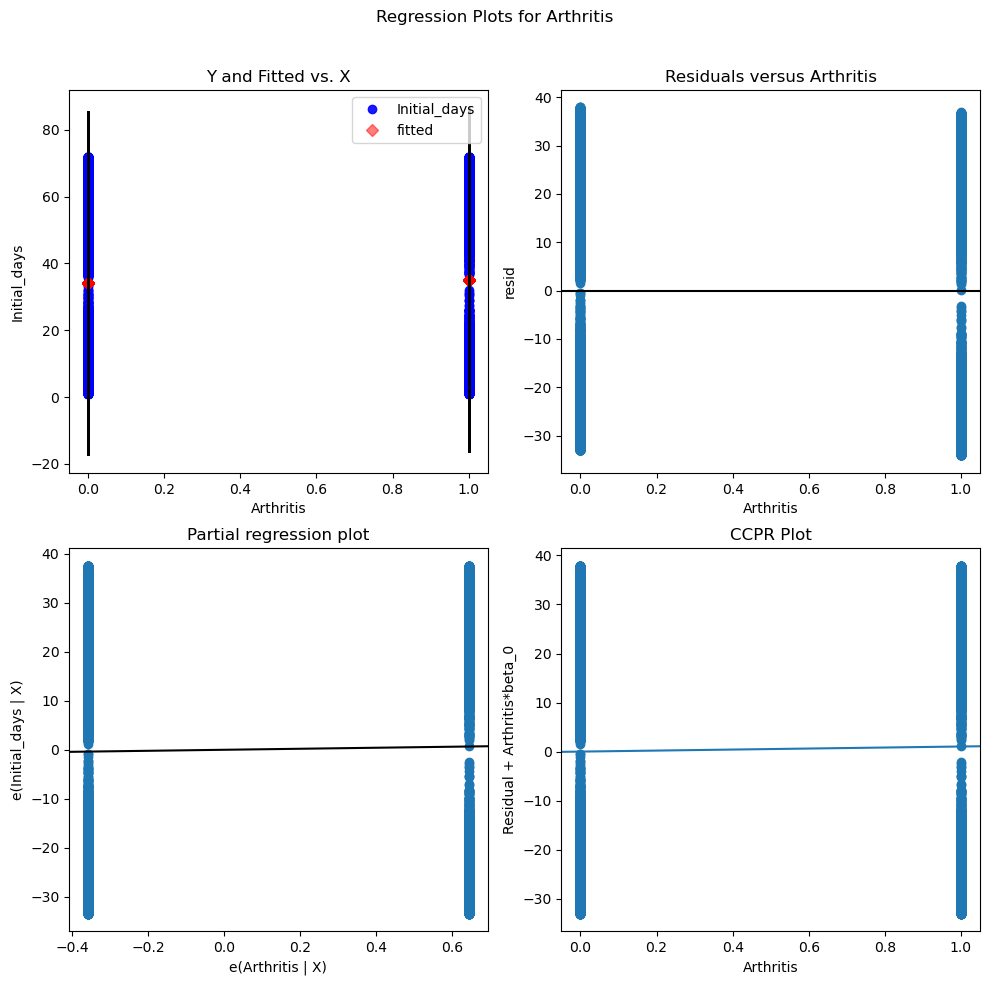

In [393]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Arthritis', fig=plt.figure(figsize=(10,10)));

In [394]:
#residual standard error
influence=results.get_influence()

A lower residual standard error is generally better. Here, we can see that our residual standard error is 26, which is not considered good. This is ued to measure the standard deviation of the residuals in a regression model. It can also determine how well a regression model fits a data set. The smaller the residual standard error, the better a regression model fits a dataset (D208 Course Webinars).

In [395]:
#obtain standardized residuals
standardized_residuals=influence.resid_studentized_internal

In [396]:
results.resid.std(ddof=x.shape[1])

26.305953694516734

The standardized residuals determine if there are any outliers in the regression model. Any standardized residual with an absolute value greater than 3 is considered an outlier. No outliers are found based on the standardized residuals presented. 

In [397]:
print(standardized_residuals)

[-0.93286652 -0.72060692 -1.11436535 ...  1.37127313  1.11285981
  1.35837347]


Model equation: ŷ = 34.0843 + 1.0379(Arthritis)

It is my recommended course of action that a different set of variables could be analyzed instead since we only have one significant variable for this model. Another MLR could be built from the ground up, and, while the research question (to analyze which factors influence the length of initial hospitalization) can perhaps remain the same, the independent variables should be different. Suffice it to say, however, this exercise was not a waste of resources as we have determined statistical significance of at least one variable.

It would also be prudent to examine this variable in greater depth with other variables so as to aid the company/institution for which we have performed this MLR to determine ways to decrease the length of initial hospitalization by way of addressing the prevalence of these variables. For example, we may want to look into preventive measures for arthritis for patients since it results in a 1.0379 unit increase in initial days spent in hospital.